In [1]:
import nltk
import gensim

In [2]:
from nltk.corpus import brown
from gensim.models.doc2vec import TaggedDocument

# convert each category in the Brown corpus to a Tagged Document
documents = [TaggedDocument(brown.words(categories=cat), [idx]) for idx, cat in enumerate(brown.categories())]

In [3]:
from gensim.models.doc2vec import Doc2Vec

# define doc2vec model for the Brown corpus
vec_size = 50
epochs = 100
brown_model = Doc2Vec(documents, vector_size=vec_size, min_count=2, epochs=epochs)

In [4]:
# train for 100 epochs
%time brown_model.train(documents, total_examples=brown_model.corpus_count, epochs=100)

CPU times: user 1min 48s, sys: 16.2 s, total: 2min 4s
Wall time: 1min 29s


In [5]:
# extract Brown corpus document embeddings
doc_vecs = brown_model.docvecs.vectors_docs

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# standardize embeddings
scaler = StandardScaler()
brown_standardized_embeddings = scaler.fit_transform(doc_vecs)

# reduce to 2d with TSNE
tsne_1 = TSNE(random_state=42, perplexity=1)
embeddings_2d_tsne = tsne_1.fit_transform(brown_standardized_embeddings)

# reduce to 2d with PCA
pca_1 = PCA(n_components=2)
embeddings_2d_pca = pca_1.fit_transform(brown_standardized_embeddings)

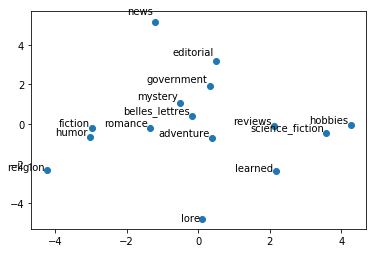

In [7]:
import matplotlib.pyplot as plt

## Plot the PCA reduced embeddings in 2D
plt.scatter(embeddings_2d_pca[:,0], embeddings_2d_pca[:,1])

for label, x, y in zip(brown.categories(), embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, y),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

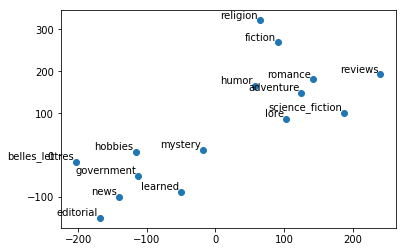

In [8]:
plt.scatter(embeddings_2d_tsne[:,0], embeddings_2d_tsne[:,1])

## Plot the TSNE reduced embeddings in 2D
for label, x, y in zip(brown.categories(), embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2,0),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [9]:
from nltk.corpus import gutenberg 

# convert each file in the Gutenberg corpus to a Tagged Document
gutenberg_docs = [TaggedDocument(gutenberg.words(fileids=file), [idx]) for idx, file in enumerate(gutenberg.fileids())]

In [10]:
# define doc2vec model for the Gutenberg corpus
gutenberg_model = Doc2Vec(gutenberg_docs, vector_size=vec_size, min_count=2, epochs=epochs)

In [11]:
# train for 100 epochs
gutenberg_model.train(gutenberg_docs, total_examples=gutenberg_model.corpus_count, epochs=100)

In [12]:
# extract Gutenberg corpus document embeddings
gutenberg_doc_vecs = gutenberg_model.docvecs.vectors_docs

In [13]:
# standardize embeddings
scaler = StandardScaler()
gutenberg_standardized_embeddings = scaler.fit_transform(gutenberg_doc_vecs)

# reduce to 2d with TSNE
tsne_1 = TSNE(random_state=42, perplexity=1)
embeddings_2d_tsne = tsne_1.fit_transform(gutenberg_standardized_embeddings)

# reduce to 2d with PCA
pca_1 = PCA(n_components=2)
embeddings_2d_pca = pca_1.fit_transform(gutenberg_standardized_embeddings)

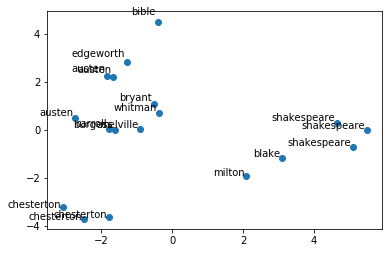

In [14]:
## Plot the PCA reduced embeddings in 2D
plt.scatter(embeddings_2d_pca[:,0], embeddings_2d_pca[:,1])

for label, x, y in zip([f.split('-')[0] for f in gutenberg.fileids()], embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, y),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

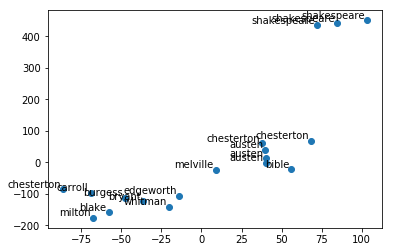

In [15]:
## Plot the TSNE reduced embeddings in 2D
plt.scatter(embeddings_2d_tsne[:,0], embeddings_2d_tsne[:,1])

for label, x, y in zip([f.split('-')[0] for f in gutenberg.fileids()], embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2,0),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [16]:
# helper label dictionaries for Brown corpus
label2idx = {f:idx for idx, f in enumerate(brown.categories())}
idx2label = {idx:f for idx, f in enumerate(brown.categories())}

In [19]:
import numpy as np
from scipy.spatial.distance import cdist

# helper function to calculate n most similar vectors by cosine similarity
def n_most_similar(vec_idx, embeddings, n=3):
    # calculate cosine distance
    dists = cdist(embeddings[vec_idx,:].reshape(1, -1), embeddings)
    
    # get idx of n smallest dists
    idxs = np.argsort(dists.reshape(-1))[1:n+1]
    return idxs, dists.reshape(-1)[idxs]

# prints output from n_most_similar nicely
def print_n_most_similar(vec_idx, embeddings, idx2label, n=3):
    idxs, dists = n_most_similar(vec_idx, embeddings, n)
    label = idx2label[vec_idx]
    print(f"Most similar to {label}:")
    for i, out in enumerate(zip(idxs, dists)):
        l = idx2label[out[0]]
        print(f"   {i+1}. {l} -  Dist: {out[1]:.2f}")

In [20]:
print_n_most_similar(label2idx['adventure'], brown_standardized_embeddings, idx2label)

Most similar to adventure:
   1. romance -  Dist: 8.80
   2. government -  Dist: 9.00
   3. mystery -  Dist: 9.05


In [21]:
print_n_most_similar(label2idx['news'], brown_standardized_embeddings, idx2label)

Most similar to news:
   1. government -  Dist: 9.02
   2. editorial -  Dist: 9.29
   3. adventure -  Dist: 9.87
